<div align="center" style="display: flex; justify-content: space-between;">
  <div style="flex: 1; padding: 10px;">
    <a href="https://github.com/encord-team/text-to-image-eval/actions?query=workflow%3ATests" target="_blank" style="text-decoration:none"><img src="https://github.com/encord-team/text-to-image-eval/actions/workflows/tests.yml/badge.svg?branch=main"></a>
    <a href="https://www.python.org/downloads/release/python-3119/" target="_blank" style="text-decoration:none"><img src="https://img.shields.io/badge/python-3.10%2B-blue" alt="Python Versions"></a>
    <a target="_blank" style="text-decoration:none"><img alt="PRs Welcome" src="https://img.shields.io/badge/PRs-Welcome-blue"></a>
    <img alt="License" src="https://img.shields.io/github/license/encord-team/text-to-image-eval">
  </div>
  <div style="flex: 1; padding: 10px;">
    <a href="https://github.com/encord-team/encord-notebooks" target="_blank" style="text-decoration:none"><img alt="Encord Notebooks" src="https://img.shields.io/badge/Encord_Notebooks-blue?logo=github&label=&labelColor=181717"></a>
    <a href="https://join.slack.com/t/encordactive/shared_invite/zt-1hc2vqur9-Fzj1EEAHoqu91sZ0CX0A7Q" target="_blank" style="text-decoration:none"><img alt="Join us on Slack" src="https://img.shields.io/badge/Join_Our_Community-4A154B?label=&logo=slack&logoColor=white"></a>
    <a href="https://twitter.com/encord_team" target="_blank" style="text-decoration:none"><img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/encord_team?label=%40encord_team&amp;style=social"></a>
  </div>
</div>

<h1 align="center">
    <img src="https://storage.googleapis.com/docs-media.encord.com/static/img/text-to-image-eval/tti-eval-banner-short.png" alt="tti-eval logo banner">
</h1>

# 📝 tti-eval | 🗄️ Bring Your Own Dataset From Encord Quickstart

Welcome to the *Bring Your Own Dataset From Encord Quickstart* guide for the `tti-eval` tool.
This notebook covers how to bring a dataset from Encord to `tti-eval`.

In this notebook, you will explore:
- How to find the required information of the dataset on the Encord website.
- Generating and registering the new dataset definition.
- ⭐ Start using your dataset right away.

## Overview

`tti-eval` is a repository for benchmarking text-to-image models **on your own data**!

With this library, you can take an embedding model intended for jointly embedding images and text (like [CLIP](https://huggingface.co/openai/clip-vit-large-patch14-336)) and compute metrics for how well such model performs on classifying your custom dataset.

> Learn more about 📝 `tti-eval`:
> - [🖥️ CLI Quickstart](https://colab.research.google.com/drive/1SsKre_9vQ9SAIQyPFQmbUBXRKzoZv8AH?usp=sharing)
> - [🐍 Python Quickstart](https://colab.research.google.com/drive/1DNn5uH6rss8I4BZG4-Y0rayRkRwYXwMu?usp=sharing)
> - [🤖 Bring Your Own Model From Hugging Face Quickstart](https://colab.research.google.com/drive/1ZuhBJ5QtH3MKuO-Y5QiiEKoz4BU1Un-8?usp=sharing)
> - [GitHub repository](https://github.com/encord-team/text-to-image-eval)

## Set up the repo and dependencies

In [ ]:
!git clone https://github.com/encord-team/text-to-image-eval.git
%cd text-to-image-eval
!python -m pip install -e .

## Bring your dataset from Encord

Encord provides a Dataset abstraction that includes only the raw data, without any annotations. To access both the data and labels, you will need to get a Project, which holds the annotations made on the dataset with a specific Ontology, that houses the declaration of the object and classification classes.

To register a Dataset from Encord, you will require the hash of the project and the hash of the multiclass classification (referred to as radio button classification within Encord) you intend to utilize moving forward. With this information, store the dataset definition as a JSON file in the `sources/datasets/` folder at the root of the repository, adhering to this structure:

```json
{
  "dataset_type": "EncordDataset",
  "title": "<title-in-tti-eval>",
  "project_hash": "<target-project-hash>",
  "classification_hash": "<target-classification-hash>"
}
```

### 1. Find the hash of the Encord Project

Open the [Encord app](https://app.encord.com/) and navigate to the target project. The project hash is located below the project title. Please refer to the image for visual guidance.

![project-hash-location](https://storage.googleapis.com/docs-media.encord.com/static/img/text-to-image-eval/project-hash-location-encord.png)

In [2]:
#@markdown Overwrite the project hash with the actual hash
project_hash = "273fb578-6f20-429d-92c6-06a5f5ba5664"

### 2. Find the classification hash within the Ontology

To view the associated Ontology of the current project, navigate to 'Settings > Ontology settings > Edit Ontology'. In the 'Ontology preview' section, ensure the 'Display JSON' toggle is enabled. You will find the hash of the target classification there. Please refer to the image for visual guidance.

![classification-hash-location](https://storage.googleapis.com/docs-media.encord.com/static/img/text-to-image-eval/classification-hash-location-encord.png)

In [3]:
#@markdown Overwrite the classification hash with the actual hash
classification_hash = "9rFHnsr5"

### 3. Register the dataset to `tti-eval`

 With the project hash and classification hash at hand, let's include the dataset definition as a JSON file in the `sources/datasets/` folder at the root of the repository, adhering to this structure:

```json
{
  "dataset_type": "EncordDataset",
  "title": "<title-in-tti-eval>",
  "project_hash": "<target-project-hash>",
  "classification_hash": "<target-classification-hash>"
}
```

In [ ]:
import json
from pathlib import Path

dataset_definition = {
  "dataset_type": "EncordDataset",
  "title": "my-dataset",
  "project_hash": project_hash,
  "classification_hash": classification_hash,
}

Path('./sources/datasets/my-dataset.json').write_text(json.dumps(dataset_definition, indent=2), encoding="utf-8")

Your dataset has now been permanently incorporated into `tti-eval` and is ready to be utilized for any future tasks.

> Please note that any dataset operation requires an SSH key associated with an Encord user holding admin privileges for the relevant Encord Project. You can specify the SSH key location directly in the dataset by including the additional field `ssh_key_path` in the dataset definition. In the absence of this field, `tti-eval` will default to using the global `ENCORD_SSH_KEY_PATH` environment variable.

### [EXTRA] Test the dataset availability

In [12]:
#@title Execute me to prepare an SSH key {display-mode: "form"}
import subprocess
import html
from IPython.display import Image, HTML

def generate_public_private_keypair() -> tuple[Path, Path]:
    """
    returns: public and private key paths, respectively.
    """
    public_key_path = Path("/content/colab_key.pub")
    private_key_path = public_key_path.with_suffix("")
    if not (public_key_path.is_file() and private_key_path.is_file()):
        if public_key_path.is_file(): public_key_path.unlink()
        if private_key_path.is_file(): private_key_path.unlink()
        devnull = subprocess.DEVNULL
        subprocess.run(f'ssh-keygen -t ed25519 -f {private_key_path} -N "" -q', shell=True, stdout=devnull)
        print("We have created a public/private ssh key pair for you.")
    return public_key_path, private_key_path

def key_with_prompt():
    public_key_path, private_key_path = generate_public_private_keypair()
    public_key_content = html.escape(public_key_path.read_text())
    display(HTML(f'''
    <script>
    function copyToClipboard() {{ console.log({{tmp: "{public_key_content.strip()}"}}); navigator.clipboard.writeText("{public_key_content.strip()}"); }}
    </script>
    <div style="border-radius: 5px; border: dashed 1px yellow; padding: 1rem;">
        <p>
            <strong>NB</strong> Please follow these steps to link this notebook to your <svg style="display: inline-block; margin-top: 4px;" width="60px" height="12px" viewBox="0 0 158 32" version="1.1"><defs><radialGradient id="radial0" gradientUnits="userSpaceOnUse" cx="0" cy="0" fx="0" fy="0" r="1" gradientTransform="matrix(-40.949857,45.042762,-45.657265,-41.873903,43.317878,-18.61969)"><stop offset="0" style="stop-color: rgb(255, 239, 221); stop-opacity: 1;"></stop><stop offset="0.99" style="stop-color: rgb(94, 68, 255); stop-opacity: 1;"></stop></radialGradient><clipPath id="clip1"><path d="M 0 16 L 28 16 L 28 31.554688 L 0 31.554688 Z M 0 16 "></path></clipPath><radialGradient id="radial1" gradientUnits="userSpaceOnUse" cx="0" cy="0" fx="0" fy="0" r="1" gradientTransform="matrix(-40.949857,45.042762,-45.657265,-41.873903,43.317878,-18.618776)"><stop offset="0" style="stop-color: rgb(255, 239, 221); stop-opacity: 1;"></stop><stop offset="0.99" style="stop-color: rgb(94, 68, 255); stop-opacity: 1;"></stop></radialGradient><radialGradient id="radial2" gradientUnits="userSpaceOnUse" cx="0" cy="0" fx="0" fy="0" r="1" gradientTransform="matrix(-40.949857,45.042762,-45.657265,-41.873903,43.317878,-18.618645)"><stop offset="0" style="stop-color: rgb(255, 239, 221); stop-opacity: 1;"></stop><stop offset="0.99" style="stop-color: rgb(94, 68, 255); stop-opacity: 1;"></stop></radialGradient></defs><g id="surface1"><path d="M 27.855469 12.445312 C 27.855469 13.65625 27.054688 14.757812 25.734375 15.589844 L 25.730469 15.589844 L 25.253906 15.867188 L 24.402344 16.359375 C 23.074219 15.816406 21.449219 15.503906 19.703125 15.503906 C 17.613281 15.503906 15.710938 15.953125 14.273438 16.691406 L 3.519531 22.921875 C 1.425781 22.078125 0.0664062 20.6875 0.0664062 19.109375 C 0.0664062 17.898438 0.863281 16.796875 2.179688 15.96875 L 3.511719 15.191406 C 4.84375 15.730469 6.464844 16.046875 8.210938 16.046875 C 10.292969 16.046875 12.183594 15.601562 13.628906 14.863281 L 24.394531 8.621094 C 26.484375 9.46875 27.847656 10.859375 27.847656 12.441406 Z M 27.855469 12.445312 " style="stroke: none; fill-rule: nonzero; fill: url(&quot;#radial0&quot;);"></path><g clip-path="url(#clip1)" clip-rule="nonzero"><path d="M 27.855469 20.1875 C 27.855469 21.394531 27.054688 22.5 25.734375 23.328125 L 25.730469 23.328125 L 25.253906 23.609375 L 13.636719 30.339844 C 12.191406 31.074219 10.300781 31.523438 8.21875 31.523438 C 3.710938 31.515625 0.0664062 29.425781 0.0664062 26.847656 C 0.0664062 25.640625 0.863281 24.535156 2.179688 23.707031 L 3.511719 22.9375 C 4.84375 23.476562 6.464844 23.792969 8.210938 23.792969 C 10.292969 23.792969 12.183594 23.347656 13.628906 22.609375 L 24.402344 16.367188 C 26.488281 17.214844 27.855469 18.605469 27.855469 20.1875 Z M 27.855469 20.1875 " style="stroke: none; fill-rule: nonzero; fill: url(&quot;#radial1&quot;);"></path></g><path d="M 27.855469 4.710938 C 27.855469 5.917969 27.054688 7.019531 25.734375 7.851562 L 25.730469 7.851562 L 25.253906 8.132812 L 24.402344 8.628906 C 23.074219 8.085938 21.449219 7.773438 19.703125 7.773438 C 17.613281 7.773438 15.710938 8.222656 14.273438 8.960938 L 3.511719 15.191406 C 1.425781 14.347656 0.0664062 12.949219 0.0664062 11.375 C 0.0664062 10.167969 0.863281 9.066406 2.179688 8.234375 L 14.265625 1.226562 C 15.710938 0.484375 17.613281 0.03125 19.703125 0.03125 C 24.199219 0.03125 27.855469 2.128906 27.855469 4.710938 Z M 27.855469 4.710938 " style="stroke: none; fill-rule: nonzero; fill: url(&quot;#radial2&quot;);"></path><path d="M 57.777344 25.917969 L 57.777344 5.589844 C 57.777344 5.394531 57.933594 5.230469 58.136719 5.230469 L 60.242188 5.230469 C 60.421875 5.230469 60.597656 5.324219 60.703125 5.472656 L 71.898438 21.472656 C 71.945312 21.539062 72.042969 21.503906 72.042969 21.425781 L 72.042969 5.589844 C 72.042969 5.394531 72.199219 5.230469 72.402344 5.230469 L 74.441406 5.230469 C 74.636719 5.230469 74.800781 5.386719 74.800781 5.589844 L 74.800781 25.917969 C 74.800781 26.117188 74.644531 26.277344 74.441406 26.277344 L 72.226562 26.277344 C 72.109375 26.277344 72.003906 26.21875 71.933594 26.128906 L 60.820312 10.234375 C 60.730469 10.109375 60.535156 10.167969 60.535156 10.324219 L 60.535156 25.917969 C 60.535156 26.117188 60.378906 26.277344 60.175781 26.277344 L 58.136719 26.277344 C 57.941406 26.277344 57.777344 26.121094 57.777344 25.917969 Z M 57.777344 25.917969 " style="stroke: none; fill-rule: nonzero; fill: rgb(255, 255, 255); fill-opacity: 1;"></path><path d="M 87.296875 26.730469 C 85.097656 26.730469 83.238281 26.265625 81.703125 25.34375 C 80.171875 24.417969 79.007812 23.128906 78.199219 21.484375 C 77.402344 19.839844 76.996094 17.933594 76.996094 15.769531 C 76.996094 13.609375 77.394531 11.703125 78.199219 10.054688 C 79 8.410156 80.171875 7.125 81.703125 6.195312 C 83.238281 5.269531 85.097656 4.8125 87.296875 4.8125 C 89.851562 4.8125 91.953125 5.433594 93.597656 6.667969 C 95.144531 7.828125 96.242188 9.371094 96.886719 11.285156 C 96.953125 11.488281 96.828125 11.707031 96.628906 11.753906 L 94.554688 12.277344 C 94.371094 12.324219 94.195312 12.210938 94.136719 12.042969 C 93.675781 10.625 92.902344 9.496094 91.820312 8.644531 C 90.664062 7.738281 89.15625 7.289062 87.296875 7.289062 C 85.652344 7.289062 84.285156 7.640625 83.195312 8.351562 C 82.101562 9.0625 81.28125 10.054688 80.730469 11.335938 C 80.175781 12.609375 79.898438 14.09375 79.882812 15.765625 C 79.871094 17.441406 80.144531 18.910156 80.695312 20.183594 C 81.25 21.460938 82.074219 22.453125 83.175781 23.171875 C 84.28125 23.886719 85.652344 24.242188 87.296875 24.242188 C 89.15625 24.242188 90.664062 23.785156 91.820312 22.875 C 92.902344 22.027344 93.675781 20.898438 94.136719 19.488281 C 94.195312 19.308594 94.371094 19.207031 94.554688 19.25 L 96.628906 19.773438 C 96.828125 19.828125 96.953125 20.046875 96.886719 20.246094 C 96.242188 22.164062 95.144531 23.707031 93.597656 24.863281 C 91.945312 26.101562 89.84375 26.714844 87.296875 26.714844 Z M 87.296875 26.730469 " style="stroke: none; fill-rule: nonzero; fill: rgb(255, 255, 255); fill-opacity: 1;"></path><path d="M 108.234375 26.742188 C 106.035156 26.742188 104.175781 26.28125 102.640625 25.359375 C 101.105469 24.429688 99.941406 23.144531 99.144531 21.5 C 98.34375 19.851562 97.941406 17.945312 97.941406 15.785156 C 97.941406 13.625 98.335938 11.714844 99.144531 10.070312 C 99.941406 8.425781 101.105469 7.136719 102.640625 6.210938 C 104.175781 5.285156 106.035156 4.828125 108.234375 4.828125 C 110.429688 4.828125 112.308594 5.289062 113.839844 6.210938 C 115.371094 7.136719 116.535156 8.425781 117.328125 10.070312 C 118.121094 11.714844 118.527344 13.625 118.527344 15.785156 C 118.527344 17.945312 118.128906 19.851562 117.328125 21.5 C 116.53125 23.144531 115.367188 24.429688 113.839844 25.359375 C 112.304688 26.285156 110.4375 26.742188 108.234375 26.742188 Z M 108.234375 24.261719 C 109.878906 24.269531 111.242188 23.914062 112.34375 23.203125 C 113.433594 22.484375 114.261719 21.492188 114.808594 20.210938 C 115.359375 18.9375 115.632812 17.464844 115.632812 15.785156 C 115.632812 14.105469 115.351562 12.636719 114.808594 11.363281 C 114.253906 10.089844 113.433594 9.097656 112.34375 8.390625 C 111.25 7.679688 109.886719 7.320312 108.234375 7.308594 C 106.589844 7.296875 105.222656 7.648438 104.136719 8.359375 C 103.050781 9.070312 102.230469 10.070312 101.679688 11.351562 C 101.125 12.628906 100.847656 14.113281 100.839844 15.785156 C 100.828125 17.464844 101.101562 18.933594 101.652344 20.199219 C 102.207031 21.464844 103.03125 22.460938 104.125 23.171875 C 105.222656 23.890625 106.589844 24.25 108.234375 24.261719 Z M 108.234375 24.261719 " style="stroke: none; fill-rule: nonzero; fill: rgb(255, 255, 255); fill-opacity: 1;"></path><path d="M 137.050781 25.769531 L 132.910156 17.957031 C 133.976562 17.578125 134.832031 16.960938 135.476562 16.128906 C 136.386719 14.941406 136.855469 13.53125 136.855469 11.886719 C 136.855469 10.773438 136.640625 9.757812 136.210938 8.828125 C 135.800781 7.902344 135.164062 7.152344 134.324219 6.542969 C 133.492188 5.921875 132.441406 5.542969 131.21875 5.355469 C 130.925781 5.316406 130.632812 5.277344 130.328125 5.261719 C 130.015625 5.261719 129.761719 5.242188 129.527344 5.242188 L 120.878906 5.242188 C 120.683594 5.242188 120.507812 5.414062 120.507812 5.601562 L 120.507812 25.9375 C 120.507812 26.128906 120.683594 26.296875 120.878906 26.296875 L 122.960938 26.296875 C 123.175781 26.296875 123.332031 26.128906 123.332031 25.9375 L 123.332031 18.886719 C 123.332031 18.675781 123.507812 18.527344 123.703125 18.527344 L 130.015625 18.527344 L 133.996094 26.089844 C 134.054688 26.21875 134.171875 26.296875 134.324219 26.296875 L 136.71875 26.296875 C 137.011719 26.296875 137.1875 26.015625 137.050781 25.769531 Z M 123.703125 16.050781 C 123.507812 16.050781 123.332031 15.882812 123.332031 15.691406 L 123.332031 8.070312 C 123.332031 7.863281 123.507812 7.710938 123.703125 7.710938 L 129.4375 7.710938 C 129.652344 7.710938 129.867188 7.730469 130.132812 7.75 C 130.386719 7.769531 130.640625 7.789062 130.875 7.84375 C 131.59375 7.992188 132.191406 8.273438 132.640625 8.691406 C 133.089844 9.101562 133.441406 9.597656 133.648438 10.160156 C 133.863281 10.730469 133.960938 11.289062 133.960938 11.878906 C 133.960938 12.464844 133.863281 13.027344 133.648438 13.597656 C 133.433594 14.164062 133.085938 14.632812 132.640625 15.046875 C 132.191406 15.457031 131.59375 15.746094 130.875 15.914062 C 130.640625 15.953125 130.386719 15.992188 130.132812 16.007812 C 129.859375 16.027344 129.644531 16.046875 129.4375 16.046875 L 123.703125 16.046875 Z M 123.703125 16.050781 " style="stroke: none; fill-rule: nonzero; fill: rgb(255, 255, 255); fill-opacity: 1;"></path><path d="M 139.28125 25.933594 L 139.28125 5.601562 C 139.28125 5.40625 139.449219 5.242188 139.664062 5.242188 L 146.59375 5.242188 C 146.835938 5.242188 147.257812 5.242188 147.863281 5.257812 C 148.46875 5.261719 149.046875 5.300781 149.59375 5.375 C 151.425781 5.589844 152.960938 6.183594 154.195312 7.152344 C 155.433594 8.117188 156.363281 9.351562 156.992188 10.847656 C 157.617188 12.34375 157.933594 13.980469 157.933594 15.765625 C 157.933594 17.546875 157.621094 19.199219 156.992188 20.695312 C 156.367188 22.191406 155.4375 23.417969 154.195312 24.386719 C 152.960938 25.351562 151.425781 25.9375 149.59375 26.15625 C 149.039062 26.21875 148.460938 26.257812 147.851562 26.273438 C 147.238281 26.285156 146.824219 26.285156 146.589844 26.285156 L 139.65625 26.285156 C 139.441406 26.285156 139.273438 26.128906 139.273438 25.925781 Z M 141.953125 23.449219 C 141.953125 23.648438 142.121094 23.808594 142.335938 23.808594 L 147.003906 23.828125 C 147.421875 23.828125 147.890625 23.816406 148.410156 23.789062 C 148.921875 23.765625 149.378906 23.726562 149.761719 23.667969 C 151.054688 23.449219 152.109375 22.96875 152.910156 22.222656 C 153.707031 21.472656 154.300781 20.539062 154.671875 19.414062 C 155.046875 18.292969 155.230469 17.082031 155.230469 15.789062 C 155.230469 14.496094 155.042969 13.242188 154.65625 12.125 C 154.273438 11.011719 153.683594 10.082031 152.875 9.339844 C 152.070312 8.59375 151.03125 8.117188 149.753906 7.914062 C 149.371094 7.847656 148.917969 7.804688 148.390625 7.785156 C 147.863281 7.765625 147.402344 7.75 147.003906 7.75 L 142.335938 7.730469 C 142.121094 7.730469 141.953125 7.886719 141.953125 8.089844 Z M 141.953125 23.449219 " style="stroke: none; fill-rule: nonzero; fill: rgb(255, 255, 255); fill-opacity: 1;"></path><path d="M 53.71875 18.808594 C 53.550781 18.710938 53.34375 18.789062 53.265625 18.964844 C 52.960938 19.691406 52.542969 20.363281 52.054688 20.957031 C 50.546875 22.792969 48.257812 23.96875 45.695312 23.96875 L 45.683594 23.96875 C 43.121094 23.96875 40.832031 22.792969 39.324219 20.949219 C 39.324219 20.949219 53.6875 12.65625 53.695312 12.648438 C 54.371094 12.191406 54.820312 11.414062 54.820312 10.535156 C 54.820312 10.019531 54.664062 9.535156 54.394531 9.128906 C 54.363281 9.082031 54.257812 8.945312 54.234375 8.914062 C 52.230469 6.40625 49.140625 4.800781 45.683594 4.800781 L 45.671875 4.800781 C 42.113281 4.800781 38.953125 6.503906 36.964844 9.128906 C 36.417969 9.839844 35.960938 10.625 35.613281 11.460938 C 35.058594 12.765625 34.753906 14.203125 34.746094 15.710938 L 34.746094 15.730469 C 34.746094 17.234375 35.046875 18.671875 35.597656 19.96875 C 35.949219 20.804688 36.40625 21.589844 36.949219 22.308594 C 38.941406 24.945312 42.105469 26.65625 45.675781 26.664062 L 45.691406 26.664062 C 49.253906 26.664062 52.417969 24.960938 54.414062 22.320312 C 54.898438 21.6875 55.3125 20.996094 55.644531 20.25 C 55.714844 20.09375 55.65625 19.917969 55.507812 19.832031 L 53.714844 18.792969 Z M 37.464844 15.746094 L 37.464844 15.726562 C 37.464844 14.714844 37.652344 13.738281 37.992188 12.84375 C 38.308594 11.988281 38.773438 11.199219 39.34375 10.507812 C 40.851562 8.683594 43.132812 7.523438 45.683594 7.515625 L 45.695312 7.515625 C 47.40625 7.515625 48.992188 8.03125 50.304688 8.925781 C 50.957031 9.363281 51.535156 9.894531 52.042969 10.5 L 37.992188 18.613281 C 37.660156 17.71875 37.476562 16.75 37.476562 15.738281 Z M 37.464844 15.746094 " style="stroke: none; fill-rule: nonzero; fill: rgb(255, 255, 255); fill-opacity: 1;"></path></g></svg> Accont.
        </p>
        <ol style="line-height: 2em;">
            <li>Click the button above to copy your public
                <button onclick="copyToClipboard()">
                    <svg stroke="purple" fill="none" stroke-width="2" viewBox="0 0 24 24" stroke-linecap="round" stroke-linejoin="round" height="1em" width="1em" xmlns="http://www.w3.org/2000/svg"><rect x="9" y="9" width="13" height="13" rx="2" ry="2"></rect><path d="M5 15H4a2 2 0 0 1-2-2V4a2 2 0 0 1 2-2h9a2 2 0 0 1 2 2v1"></path></svg>
                    Copy public key to clipboard
                </button>
                <small>OR manually copy this key content: <span style="color: #8082e6;">{public_key_content.strip()}</span></small>
            </li>
            <li>Go to the <a style="color: #8082e6;" href="https://app.encord.com/settings/public-keys" target="_blank">settings panel</a></li>
            <li>Click the <span style="color: #8082e6; border: solid 0.5px #8082e6; border-radius: 2px; padding: 1px 3px;">+ New Key</span> button</li>
            <li>Give the key a title</li>
            <li>Paste the copied public key to the second text field.</li>
            <li>Click the <span style="color: #8082e6; border: solid 0.5px #8082e6; border-radius: 2px; padding: 1px 3px;">Create</span> button</li>
        </ol>
    </div>
    '''))
    return private_key_path.resolve()
private_key_path = key_with_prompt()

In [ ]:
%env ENCORD_SSH_KEY_PATH={private_key_path}

In [6]:
#@title Simple test to check that the dataset is available in the CLI
!tti-eval list --all

Available datasets are: Alzheimer-MRI, chest-xray-classification, LungCancer4Types, my-dataset, plants, rsicd, skin-cancer, sports-classification
Available models are: apple, bioclip, clip, eva-clip, fashion, plip, pubmed, rsicd, rsicd-encord, siglip_large, siglip_small, street, tinyclip, vit-b-32-laion2b


In [9]:
#@title Let's use Python to determine the dataset size
from tti_eval.dataset import DatasetProvider, Split

my_dataset = DatasetProvider.get_dataset("my-dataset", split=Split.ALL)
len(my_dataset)

6

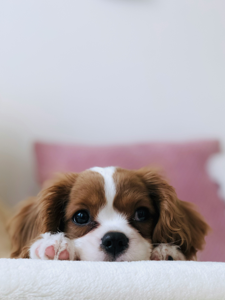

'dog'

In [10]:
#@title Let's display a sample
sample = my_dataset[-1]
image = sample["image"]
image.thumbnail((300,300)) # Scale the image, so it doesn't occupy all the screen
display(image)
my_dataset.class_names[sample["label"]]

In [ ]:
#@title Advanced test to build the embeddings of the dataset data
#@markdown It's commented as it can take some time and is slower on a CPU configuration.

# !tti-eval build --model-dataset clip/my-dataset

## Wrap Up

This notebook has provided an introduction to bringing a dataset from Encord to `tti-eval`, showcasing how to find the relevant project and classification hashes, register the dataset definition in `tti-eval`, and start using it right away.

---

🟣 `tti-eval` is an open-source repository for benchmarking text-to-image models **on your own data**!
**Check out the project on [GitHub](https://github.com/encord-team/text-to-image-eval) and leave a star 🌟** if you like it.
Contributions are welcome!
Please feel free to open an issue or submit a pull request with your suggestions, bug fixes, or new features.

---

👉 Check out the 📖 [Encord Blog](https://encord.com/blog/) and 📺 [YouTube](https://www.youtube.com/@encord) channel to stay up-to-date with the latest in computer vision, foundation models, active learning, and data-centric AI.
